<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import pickle

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('final_df\df_clean.xlsx')

In [ ]:
df.drop(df.columns[df.columns.str.contains('unnamed', case=False)],
           axis=1,
           inplace=True)

In [ ]:
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [ ]:
# определяем X y
y = np.array(df['Соотношение матрица-наполнитель'])
X = np.array(df.drop(['Соотношение матрица-наполнитель'], axis=1))

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

# архитектура модели
model_mn = Sequential()
model_mn.add(Dense(128, input_shape=(X_train.shape[1], ), activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(128, activation='relu'))
model_mn.add(Dropout(0.18))
model_mn.add(Dense(64, activation='relu'))
model_mn.add(Dropout(0.18))
model_mn.add(Dense(32, activation='relu'))
model_mn.add(Dense(16, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(1, activation='sigmoid'))

# компиляция
model_mn.compile(optimizer='adam', loss='mae', metrics=['mae'])
model_mn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1664      
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
pickle.dump(model_mn, open('model_nn.pkl','wb'))

INFO:tensorflow:Assets written to: ram://9ec38d3b-f6ca-45d4-adab-a22ba8b13200/assets


In [ ]:
y_pred = model_mn.predict(X_test[:1])
y_pred

1/1 [==============================] - 1s 1s/step


array([[0.]], dtype=float32)

In [ ]:
%%time
history = model_mn.fit(X_train, y_train, epochs=200)

Epoch 1/200
23/23 [==============================] - 1s 3ms/step - loss: 2.3883 - mae: 2.3883
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 2.3113 - mae: 2.3113
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 2.2565 - mae: 2.2565
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 2.2067 - mae: 2.2067
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 2.1646 - mae: 2.1646
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 2.1337 - mae: 2.1337
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 2.1143 - mae: 2.1143
Epoch 8/200
23/23 [==============================] - 0s 3ms/step - loss: 2.0822 - mae: 2.0822
Epoch 9/200
23/23 [==============================] - 0s 3ms/step - loss: 2.0661 - mae: 2.0661
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 2.0635 - mae: 2.0635
Epoch 11/200
23/23 [==============================] - 0s 3m

23/23 [==============================] - 0s 3ms/step - loss: 1.9356 - mae: 1.9356
Epoch 173/200
23/23 [==============================] - 0s 2ms/step - loss: 1.9356 - mae: 1.9356
Epoch 174/200
23/23 [==============================] - 0s 3ms/step - loss: 1.9356 - mae: 1.9356
Epoch 175/200
23/23 [==============================] - 0s 2ms/step - loss: 1.9356 - mae: 1.9356
Epoch 176/200
23/23 [==============================] - 0s 2ms/step - loss: 1.9356 - mae: 1.9356
Epoch 177/200
23/23 [==============================] - 0s 2ms/step - loss: 1.9356 - mae: 1.9356
Epoch 178/200
23/23 [==============================] - 0s 2ms/step - loss: 1.9356 - mae: 1.9356
Epoch 179/200
23/23 [==============================] - 0s 3ms/step - loss: 1.9356 - mae: 1.9356
Epoch 180/200
23/23 [==============================] - 0s 3ms/step - loss: 1.9356 - mae: 1.9356
Epoch 181/200
23/23 [==============================] - 0s 2ms/step - loss: 1.9356 - mae: 1.9356
Epoch 182/200
23/23 [==============================] -

In [ ]:
history.history

{'loss': [2.388345956802368,
  2.311293840408325,
  2.2565107345581055,
  2.2066752910614014,
  2.164625883102417,
  2.133735179901123,
  2.1143343448638916,
  2.082150459289551,
  2.066118001937866,
  2.063504457473755,
  2.051396131515503,
  2.022463798522949,
  2.013134479522705,
  2.004210948944092,
  1.9992058277130127,
  1.9904882907867432,
  1.9861644506454468,
  1.97730553150177,
  1.9695069789886475,
  1.9623370170593262,
  1.9573805332183838,
  1.9538860321044922,
  1.9513245820999146,
  1.9491742849349976,
  1.9475336074829102,
  1.9463294744491577,
  1.9451675415039062,
  1.9441906213760376,
  1.9433876276016235,
  1.9427050352096558,
  1.9420994520187378,
  1.9415948390960693,
  1.9411146640777588,
  1.9407086372375488,
  1.9403071403503418,
  1.9400063753128052,
  1.939700961112976,
  1.939436435699463,
  1.939205527305603,
  1.938991904258728,
  1.9387909173965454,
  1.9385888576507568,
  1.9397627115249634,
  1.9383118152618408,
  1.9381415843963623,
  1.938005328178405

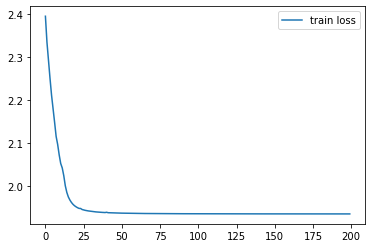

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')

plt.legend();

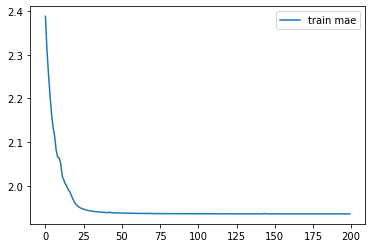

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='train mae')

plt.legend();

In [ ]:
y_pred_resutls = model_mn.predict(X_test)
y_pred_resutls

10/10 [==============================] - 0s 1ms/step


array([[0.99993175],
       [0.99993217],
       [0.99993765],
       [0.99992865],
       [0.9999347 ],
       [0.9999274 ],
       [0.9999265 ],
       [0.9999471 ],
       [0.9999412 ],
       [0.99992895],
       [0.9999393 ],
       [0.99993175],
       [0.9999297 ],
       [0.9999331 ],
       [0.99993926],
       [0.99993217],
       [0.9999327 ],
       [0.99992913],
       [0.99993277],
       [0.9999259 ],
       [0.9999284 ],
       [0.9999441 ],
       [0.9999359 ],
       [0.99992967],
       [0.99993235],
       [0.9999283 ],
       [0.99993193],
       [0.99993104],
       [0.99993736],
       [0.999926  ],
       [0.9999258 ],
       [0.99993825],
       [0.99993026],
       [0.99992657],
       [0.9999337 ],
       [0.99993175],
       [0.99992836],
       [0.9999263 ],
       [0.9999354 ],
       [0.99993116],
       [0.99993366],
       [0.99992806],
       [1.        ],
       [0.99992746],
       [0.99993014],
       [0.9999243 ],
       [0.9999292 ],
       [0.999

In [ ]:
# оценим модель
scores = model_mn.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model_mn.metrics_names[1], scores[1]*100))

10/10 [==============================] - 0s 2ms/step - loss: 1.9413 - mae: 1.9413

mae: 194.13%


In [ ]:
model_mn.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.9413 - mae: 1.9413


[1.941257119178772, 1.941257119178772]

In [ ]:
y_pred_model = model_mn.predict(X_test)

print('Model Results:')
print('Model_MAE: ', round(mean_absolute_error(y_test, y_pred_model)))
print('Model_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_model)))
print("Test score: {:.2f}".format(mean_squared_error(y_test, y_pred_model)))
print ('R Squared =',r2_score(y_test, y_pred_model))

10/10 [==============================] - 0s 4ms/step
Model Results:
Model_MAE:  2
Model_MAPE: 0.62
Test score: 4.61
R Squared = -4.351908166087065


In [ ]:
y_pred = model_mn.predict([1,1,1,1,1,1,1,1,1,1,1,1],)

ValueError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" "                 f"(type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=False
      • mask=None
